## 株価系列の統計量の取得

In [5]:
import datetime 
import pandas_datareader.data as web
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import scipy.stats as sp
%matplotlib inline

In [6]:
start = datetime.datetime(2016, 11, 4)
end   = datetime.datetime(2018, 11,4)
stocks = web.DataReader(["NIKKEI225","SP500"], "fred", start, end).fillna(method="ffill")

### 標準化

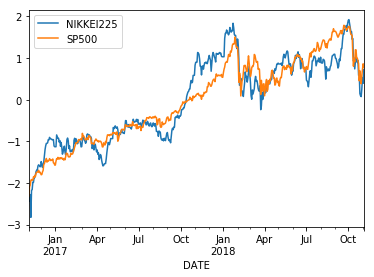

In [7]:
#standardization
z = stocks.apply(lambda x: ((x-x.mean())/x.std()),axis = 0)
z.plot()

### 変動量

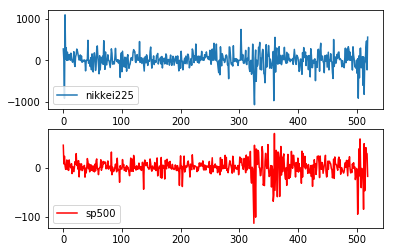

In [11]:
nikkei225 = stocks.NIKKEI225.values
sp500 = stocks.SP500.values
nikkei225_diff = np.diff(nikkei225)
sp500_diff = np.diff(sp500)
fig = plt.figure()
ax1  =fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(nikkei225_diff, label = "nikkei225")
ax2.plot(sp500_diff, label = "sp500",color= "r")
ax1.legend(loc  = "lower left")
ax2.legend()

### 価格変動率

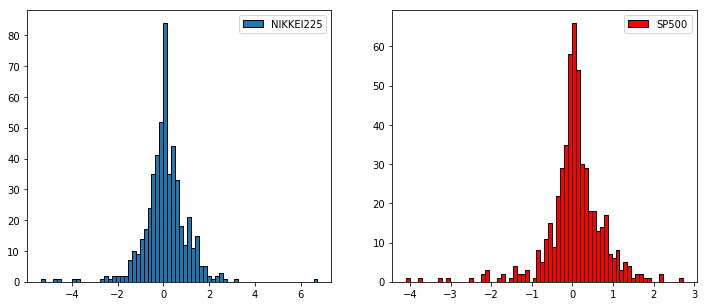

In [12]:
pct_stocks= stocks.apply(lambda x : x.pct_change()*100).dropna()
fig = plt.figure(figsize=(12,5))
ax1  =fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(pct_stocks.ix[:,0], bins = 70,label = "NIKKEI225",edgecolor = "black")
ax2.hist(pct_stocks.ix[:,1] ,color= "r",bins = 70,label = "SP500",edgecolor = "black")
ax1.legend()
ax2.legend()
plt.show()

### 変動量系列のコレログラム

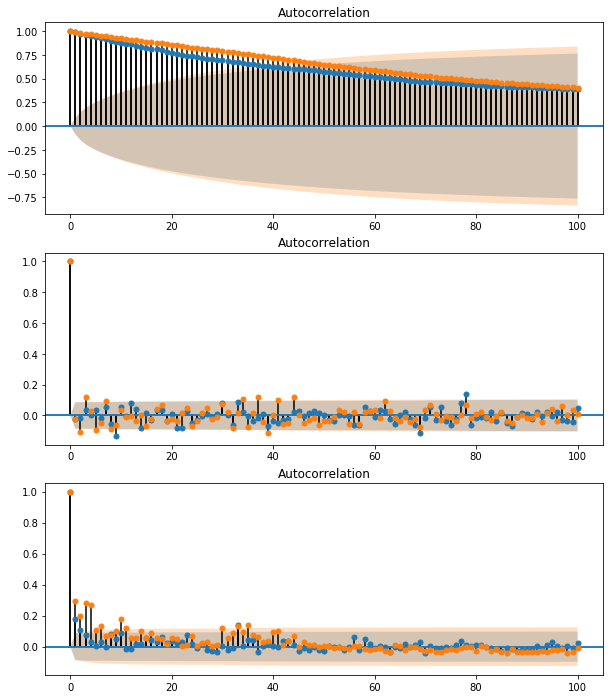

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

LAG = 100
nikkei225_diff2 = nikkei225_diff**2
sp500_diff2 = sp500_diff**2
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
#draw correlogram 
sm.graphics.tsa.plot_acf(nikkei225,lags = LAG,ax =ax1) # blew area is 95% confidential interval
sm.graphics.tsa.plot_acf(sp500,lags = LAG,ax =ax1)
sm.graphics.tsa.plot_acf(nikkei225_diff,lags = LAG,ax =ax2)
sm.graphics.tsa.plot_acf(sp500_diff,lags = LAG,ax =ax2)
sm.graphics.tsa.plot_acf(nikkei225_diff2,lags = LAG,ax =ax3)
sm.graphics.tsa.plot_acf(sp500_diff2,lags = LAG,ax =ax3)
plt.show()

### 価格変動率の±σ内，±3σ外の確率

In [17]:
x  = pct_stocks.ix[:,0]
y = pct_stocks.ix[:,1]

def sigma(x):
    in_1sigma = len([i for i in x if np.average(x)-np.std(x)<i<np.average(x)+np.std(x)])/len(x)
    out_3sigma = len([i for i in x if i<np.average(x)-np.std(x)*2 or i>np.average(x)+np.std(x)*2])/len(x)
    return round(in_1sigma,3) , round(out_3sigma,3)

print ("nikkei225",sigma(x))
print("sp500",sigma(y))
print(x)

nikkei225 (0.769, 0.042)
sp500 (0.79, 0.056)
DATE
2016-11-07    1.608070
2016-11-08   -0.033940
2016-11-09   -5.356820
2016-11-10    6.724778
2016-11-11    0.175100
2016-11-14    1.714150
2016-11-15   -0.025293
2016-11-16    1.098361
2016-11-17    0.002351
2016-11-18    0.586588
2016-11-21    0.771452
2016-11-22    0.314371
2016-11-23    0.000000
2016-11-24    0.938560
2016-11-25    0.260781
2016-11-28   -0.132363
2016-11-29   -0.271560
2016-11-30    0.007866
2016-12-01    1.117733
2016-12-02   -0.470153
2016-12-05   -0.819979
2016-12-06    0.468126
2016-12-07    0.741536
2016-12-08    1.453125
2016-12-09    1.230451
2016-12-12    0.835212
2016-12-13    0.498511
2016-12-14    0.016052
2016-12-15    0.104812
2016-12-16    0.660794
                ...   
2018-09-24    0.000000
2018-09-25    0.294638
2018-09-26    0.390681
2018-09-27   -0.986320
2018-09-28    1.358589
2018-10-01    0.521226
2018-10-02    0.102533
2018-10-03   -0.657832
2018-10-04   -0.561321
2018-10-05   -0.800396
2018-10

### 尖度

In [542]:
nikkei_moment4 = sp.kurtosis(nikkei_diff)
sp500_moment4 = sp.kurtosis(sp500_diff)
print ("nikkei225:", round(nikkei_moment4,3))
print("sp500:",round(sp500_moment4,3))

nikkei225: 5.835
sp500: 7.653
